## Linear regression using Advertising dataset

In [1]:
#Loading packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler


In [2]:
#loading data
adv = pd.read_csv("D:/Programming/Datasets/advertising.csv")
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#dropping unwanted column
adv1 = adv.drop("Unnamed: 0", axis=1)
adv1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#summary statistics
adv1.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


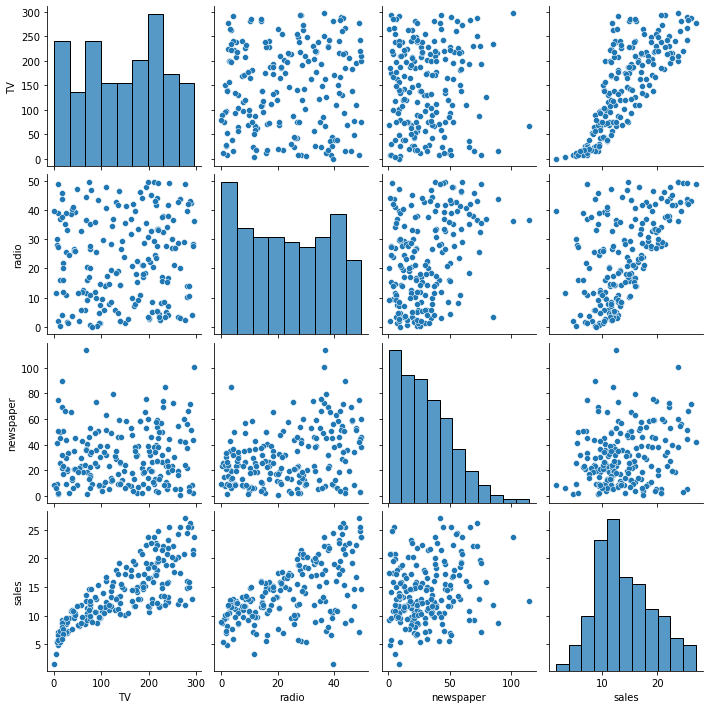

In [5]:
#visualzing the data
sns.pairplot(adv1)
plt.show();

In [6]:
#missing values
adv1.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
#Extracting the target and features
X = adv1.drop("sales", axis=1)
y = adv["sales"]

In [8]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scalling the features
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

#### Building the model

In [9]:
#Initializing linear regression model
model_lr = LinearRegression()

#fitting the model
model_lr.fit(X_train_scaled, y_train)

#predicting the model
y_pred = model_lr.predict(X_test_scaled)

#model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean_squared_error: {mse}")
print(f"r2_score: {r2}")

mean_squared_error: 3.174097353976109
r2_score: 0.8994380241009119


#### Residual Analysis

c:\Users\OKUKU\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\OKUKU\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


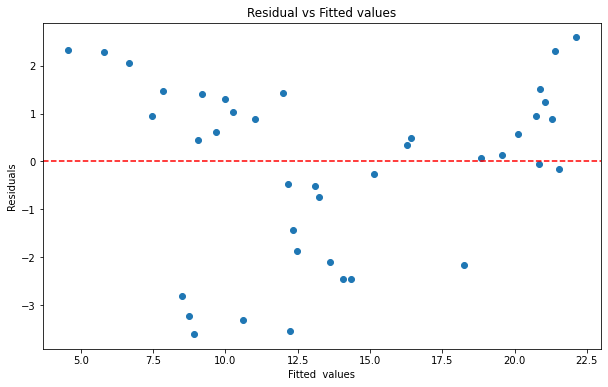

In [10]:
import statsmodels.api as sm 

#calculate residual
residuals= y_test - y_pred

#Plotting residual vs fitted values
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color= "r", linestyle= "--")
plt.xlabel("Fitted  values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted values")
plt.show()

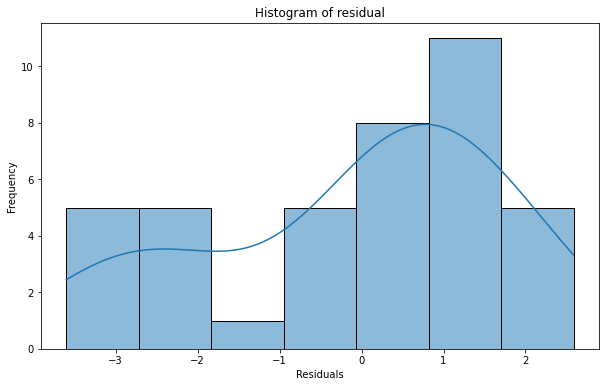

<Figure size 720x432 with 0 Axes>

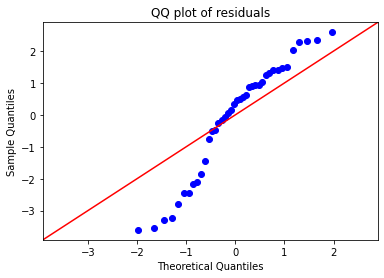

In [11]:
#Residual histogram
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of residual")
plt.show()


#Q-Q plot
plt.figure(figsize=(10,6))
sm.qqplot(residuals, line="45")
plt.title("QQ plot of residuals")
plt.show()

#### Step by step Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score

#Initializing model
model = LinearRegression()

#Performing 5-fold cross-validation for Mean Square Error(MSE)
cv_mse_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")

#Converting negative MSE score to positive
cv_mse_scores = -cv_mse_scores

#calculating the mean and std of the mse score
mean_cv_mse = cv_mse_scores.mean()
std_cv_mse = cv_mse_scores.std()

print(f"Cross-Validated Mean Squared Error: {mean_cv_mse} ± {std_cv_mse}")

#Performng 5-fold cross validation for R squared
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring="r2")

#Calculating the mean and std of R squared
mean_cv_r2= cv_r2_scores.mean()
std_cv_r2= cv_r2_scores.std()

print(f"Cross-Validated R-squared: {mean_cv_r2} ± {std_cv_r2}")

Cross-Validated Mean Squared Error: 3.0729465971002123 ± 1.284782582654003
Cross-Validated R-squared: 0.8871063495438435 ± 0.040340525877805886
